In [1]:
import numpy as np
import phate
from heatgeo.embedding import HeatGeo
import scprep
from scipy.spatial.distance import pdist, squareform
import demap


In [2]:
# data = np.load("/gpfs/gibbs/pi/krishnaswamy_smita/dl2282/dmae/data/swiss_roll_1.0.npz")
data = np.load("/gpfs/gibbs/pi/krishnaswamy_smita/dl2282/dmae/data/swiss_roll_noise0.1_seed1.npz")
# data = np.load("/gpfs/gibbs/pi/krishnaswamy_smita/dl2282/dmae/data/s_curve_noise0.1.npz")

In [3]:
data.files

['data_gt', 'data', 'colors', 'is_train']

In [4]:
x = data['data']
color = data['colors']

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes3D: >

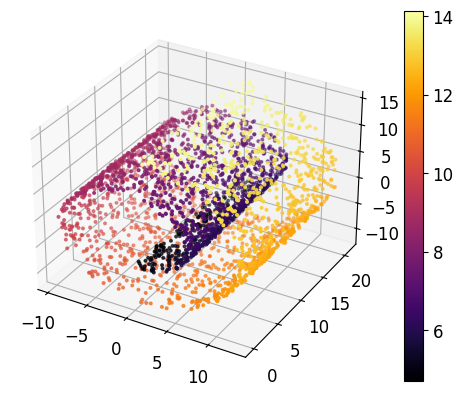

In [5]:
scprep.plot.scatter3d(x, c=color)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

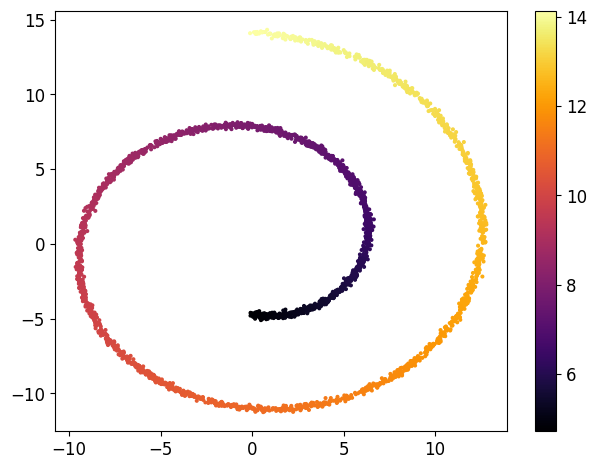

In [6]:
scprep.plot.scatter2d(x[:,[0,2]], c=color)

In [7]:
x2 = x.copy()
x2[:,1] = x[:,1] + x[:,1].max()
x3 = np.r_[x,x2]
x2 = x3.copy()
x2[:,1] = x3[:,1] + x3[:,1].max()
x3 = np.r_[x3,x2]

In [8]:
x3.shape

(12000, 3)

In [9]:
color3 = np.r_[color,color,color,color]

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes3D: >

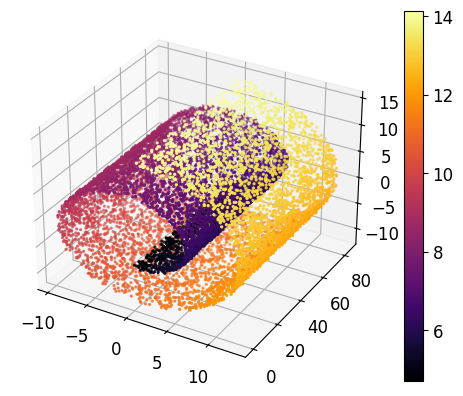

In [10]:
scprep.plot.scatter3d(x3, c=color3)

In [11]:
phate_op = phate.PHATE(knn=30, t=200, random_state=3)
# phate_op = phate.PHATE()
x_phate = phate_op.fit_transform(x3)

Calculating PHATE...
  Running PHATE on 12000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.45 seconds.
    Calculating affinities...
    Calculated affinities in 0.18 seconds.
  Calculated graph and diffusion operator in 0.65 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.82 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.47 seconds.
  Calculated landmark operator in 8.01 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.95 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.13 seconds.
Calculated PHATE in 14.76 seconds.


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'PHATE knn=30, t=200'}>

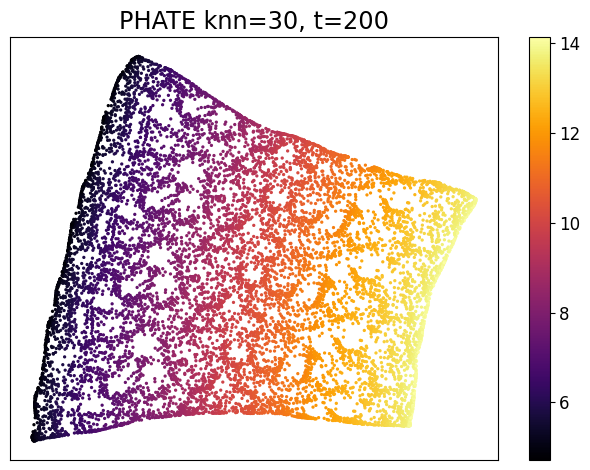

In [12]:
scprep.plot.scatter2d(x_phate, c=color3, ticks=False, title=f"PHATE knn=30, t=200")

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'PHATE knn=40, t=100'}>

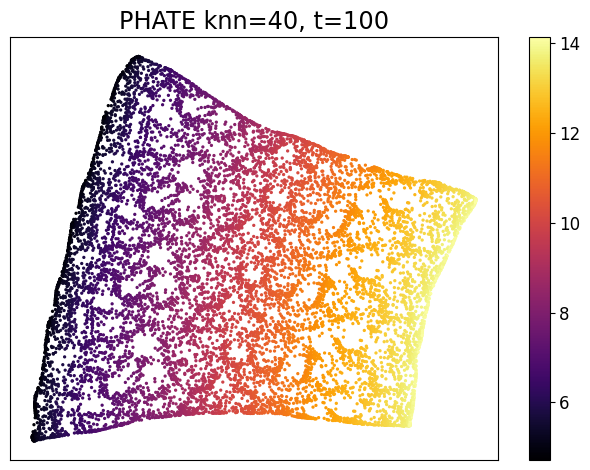

In [13]:
scprep.plot.scatter2d(x_phate, c=color3, ticks=False, title=f"PHATE knn=40, t=100")

In [14]:
emb_op = HeatGeo(knn=30, tau=100)
# emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(x3)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
scprep.plot.scatter2d(emb, ticks=False, c=color3)

ValueError: Expected c of length 3000 or 1. Got 12000

In [ ]:
# data_dict = {file: data[file] for file in data.files}

In [ ]:
# data_dict['phate'] = x_phate
# phate_dist = squareform(pdist(phate_op.diff_potential))
# data_dict['dist'] = phate_dist
# np.savez("../data/swissroll0.1_phate.npz", **data_dict)

In [ ]:
# diff_op_t = np.linalg.matrix_power(phate_op.diff_op, phate_op.t)
# diff_op_t = diff_op_t + 1e-7
# diff_potential = -1 * np.log(diff_op_t)

In [ ]:
# data_dict2 = data_dict.copy()
# data_dict2['dist'] = emb_op.dist
# data_dict2['phate'] = emb
# np.savez('../data/swissroll0.1_heatgeo.npz', **data_dict2)

In [ ]:
val = demap.DEMaP(data['data_gt'], x_phate, knn=30)
val = np.round(val, 3)
scprep.plot.scatter2d(x_phate, c=color, ticks=False, title=f"PHATE knn=40, t=26, DEMaP={val}")

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 4498500 and the array at index 1 has size 71994000

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'HeatGeo knn=40, DEMaP=0.913'}>

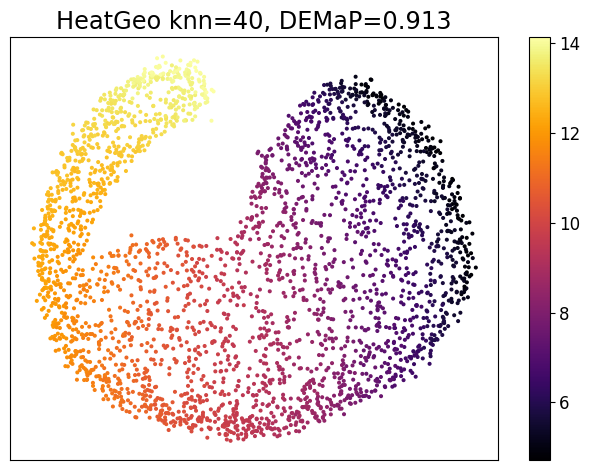

In [ ]:
val = demap.DEMaP(data['data_gt'], emb, knn=30)
val = np.round(val, 3)
scprep.plot.scatter2d(emb, c=color, ticks=False, title=f"HeatGeo knn=40, DEMaP={val}")

In [ ]:
# weights = np.exp(-phate_dist * 1/ phate_dist.std())

In [ ]:
# scprep.plot.scatter2d(x_phate, c=(phate_dist)[21,:], ticks=False)

In [ ]:
scprep.plot.scatter2d(x_phate, c=(weights)[21,:], ticks=False)

NameError: name 'weights' is not defined

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

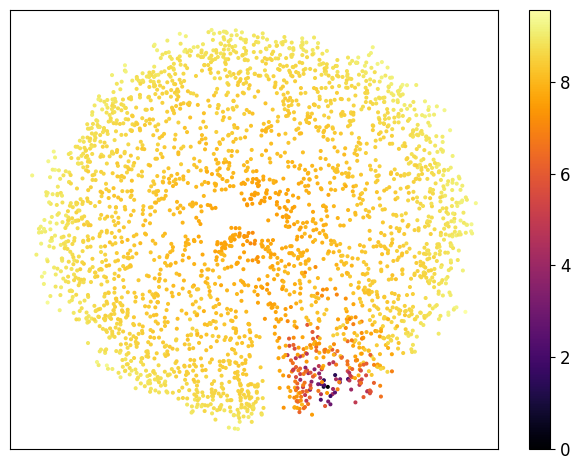

In [ ]:
scprep.plot.scatter2d(x_phate, c=phate_dist2[21,:], ticks=False)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

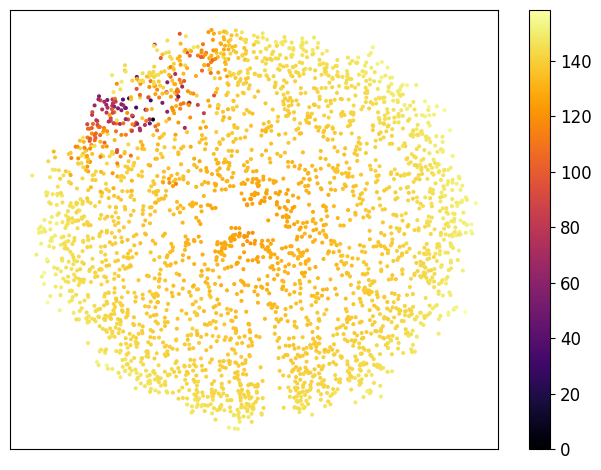

In [ ]:
scprep.plot.scatter2d(x_phate, c=phate_dist[0,:], ticks=False)

In [ ]:
import numpy as np

In [ ]:
data = np.load('../data/swissroll1.0_phate.npz')

In [ ]:
data.files

['data_gt', 'data', 'colors', 'is_train', 'phate', 'dist']

In [ ]:
data['data'].std(axis=0)

array([6.76380792, 6.23357378, 7.06691746])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes3D: >

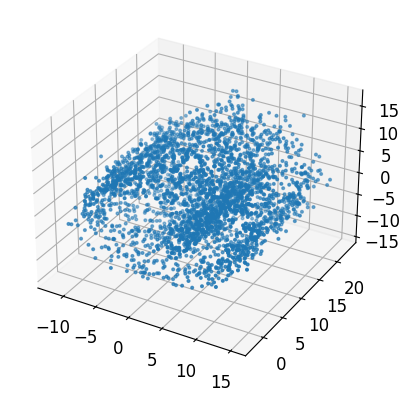

In [ ]:
scprep.plot.scatter3d(data['data'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

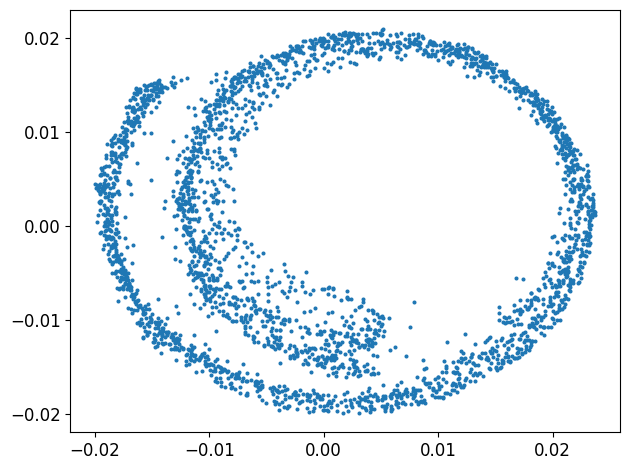

In [ ]:
scprep.plot.scatter2d(data['phate'])

In [ ]:
data['dist']/data['dist'].std()

array([[0.        , 1.81804068, 3.51467579, ..., 3.75944433, 3.13582441,
        3.58157307],
       [1.81804068, 0.        , 3.10275882, ..., 3.93456505, 1.80631004,
        3.09481787],
       [3.51467579, 3.10275882, 0.        , ..., 2.40404409, 2.03797807,
        0.20673125],
       ...,
       [3.75944433, 3.93456505, 2.40404409, ..., 0.        , 3.53964657,
        2.42309107],
       [3.13582441, 1.80631004, 2.03797807, ..., 3.53964657, 0.        ,
        1.96781733],
       [3.58157307, 3.09481787, 0.20673125, ..., 2.42309107, 1.96781733,
        0.        ]])

In [ ]:
data_eb = np.load('../data/eb_all.npz')

In [ ]:
data_eb['data'].std()

1.61346

In [ ]:
data['data'].std()

8.046783993793367

In [ ]:
data_eb['dist'].std()

48.88073938028168

In [ ]:
data['dist'].std()

79.74638153922548

In [ ]:
data_sea_ad = np.load('../data/sea_ad_gaba_all.npz')

In [ ]:
data_sea_ad['data'].std()

1.5430661641980437

In [ ]:
data_sea_ad['dist'].std()

100.14377178527961